In [1]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# DATA LOADING
df = pd.read_csv(r"C:\Users\DELL\credit-card-fraud-detection\data\creditcard.csv")

In [3]:
# INITIAL ANALYSIS
print("--- Head ---")
print(df.head())
print("\n--- Info ---")
df.info()
print("\n--- Describe ---")
print(df.describe())
print("\n--- Null Values ---")
print(df.isnull().sum().max())

--- Head ---
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V


--- Class Distribution ---
Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


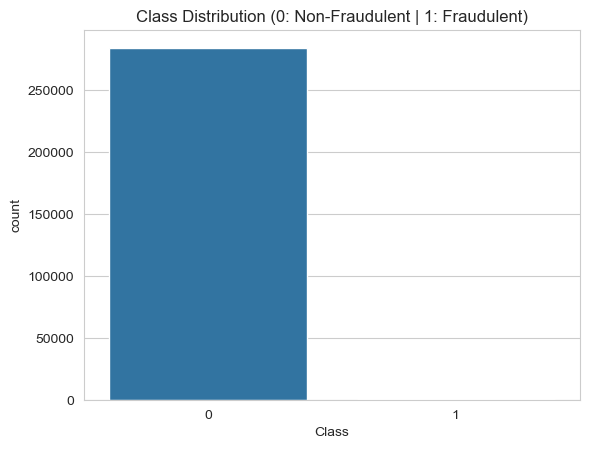

In [4]:
# CLASS DISTRIBUTION
print("\n--- Class Distribution ---")
print(df['Class'].value_counts(normalize=True))
sns.set_style('whitegrid')
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Non-Fraudulent | 1: Fraudulent)')
plt.show()

In [5]:
# TRANSACTION ANALYSIS
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]
print("\n--- Fraudulent Transaction Amount Stats ---")
print(fraud['Amount'].describe())
print("\n--- Non-Fraudulent Transaction Amount Stats ---")
print(non_fraud['Amount'].describe())


--- Fraudulent Transaction Amount Stats ---
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

--- Non-Fraudulent Transaction Amount Stats ---
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


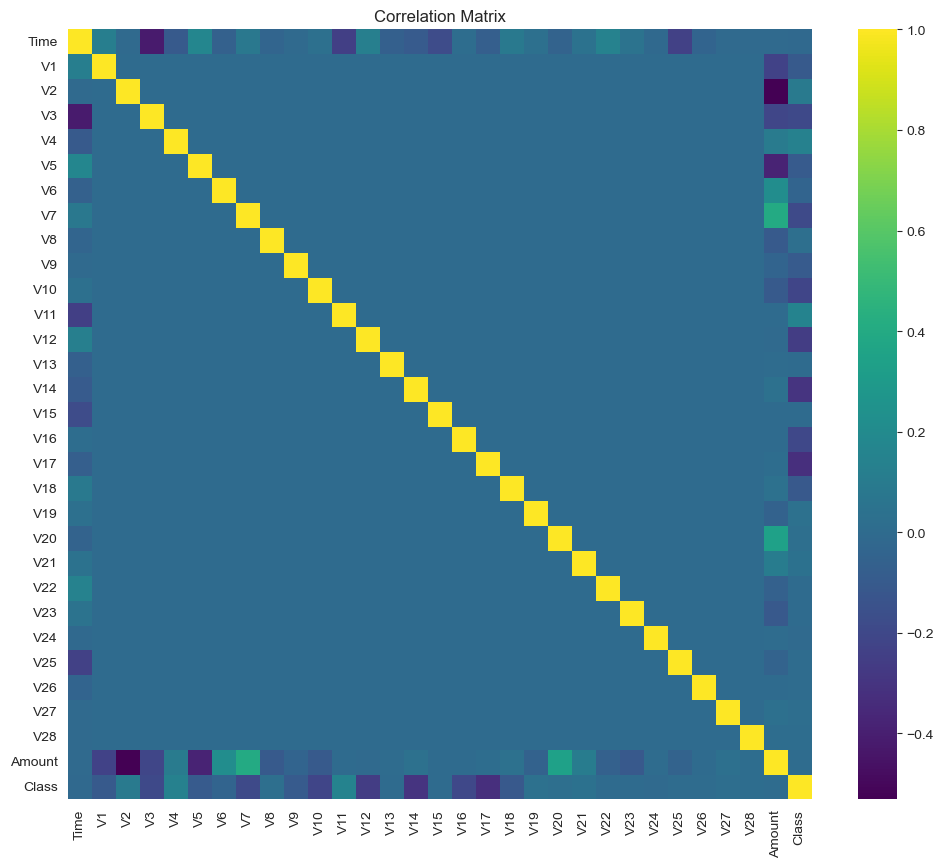

In [6]:
# CORRELATION ANALYSIS
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='viridis', annot=False)
plt.title('Correlation Matrix')
plt.show()

In [7]:
# FEATURE SCALING
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))
df.drop(['Time', 'Amount'], axis=1, inplace=True)

In [9]:
# DATA SPLITTING
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
# VERIFICATION
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (227845, 30)
X_test shape: (56962, 30)
y_train shape: (227845,)
y_test shape: (56962,)


In [11]:
# IMPORT
from imblearn.over_sampling import SMOTE

In [12]:
# RESAMPLE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [13]:
# VERIFY
print("--- Resampled Class Distribution ---")
print(y_train_resampled.value_counts())

--- Resampled Class Distribution ---
Class
0    227451
1    227451
Name: count, dtype: int64
